<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
# First thing to do is import necessary librarys for cleaning our Data 
# and Creating Features
import pandas as pd
import numpy as np



---



---



In [0]:
# Take a look at the Ames Iowa Housing Dataset:
src_url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'

# Read the data file from the src_url variable into a pandas DataFrame
iowa_housing_df = pd.read_csv(src_url)

# Display the first 10 rows to see if the DataFrame was made
print("Top 10 Rows of iowa_housing_df: ")
display(iowa_housing_df.head(10))

# Display the shape of iowa_housing_df
print("\niowa_housing_df shape: ")
display(iowa_housing_df.shape) 

In [0]:
# Using the describe function to get a statistical description of my data
print("Basic Statistical Description: \n")
display(iowa_housing_df.describe())

# Just to show that I can get descriptions of specified columns:
print("\n\nSpecified Columns Description: \n")
display(iowa_housing_df[['OverallQual','YearBuilt']].describe())

In [0]:
# Displaying the data types of each column.
pd.set_option('display.max_rows', 150)
display(iowa_housing_df.dtypes)

In [0]:
# Lets take a look at the first 10 rows of the 'BedroomAbvGr' column.
ihdf_type = iowa_housing_df['BedroomAbvGr'].dtype

# Just for fun I will use an if statement to check if its an integer.
if ihdf_type == 'int64' or ihdf_type == 'int32':
    print("Yes it's an integer")
    print("Data Type: ",ihdf_type)

In [0]:
# Another way to call columns is wuth a dot method.
iowa_housing_df.Fireplaces.head(10)

# I don't like calling columns this way, because it could possibly interfear
# with other predefined methods if they have the same name.

# Seems to be a like minded opinion amongst the forums

In [0]:
# Here is how to call specific columns using []
iowa_housing_df['Fireplaces'].head(10)

In [0]:
# I was curious to see which one would be interprited faster so I ran the 
# shell command '%timeit'
%timeit iowa_housing_df.Fireplaces.head(10)
%timeit iowa_housing_df['Fireplaces'].head(10)
print("Using df['col'] is faster on average by ", 51.9-47.9,"micro-seconds.")
# So if my previous opinion on not useing '.' to select columns wasn't enough
# to convince you. 
# Using '[]' is also faster, not by much, but still.

In [0]:
# Now let's see how selecting multiple columns looks.
# Indtead of using a list '[]' 
# I will use '[[col,col]]' to create a 2d array
iowa_housing_df[['Fireplaces', 'BedroomAbvGr']].sample(10)

In [0]:
# Looking at the first ten rows of the 'LotFrontage' column.
ihdflf = iowa_housing_df['LotFrontage']
print("Top 10 rows of iowa_housing_df['LotFrontage']: \n")
display(ihdflf.head(10))
# If statement to tell me if the dtype is a float or an int
if ihdflf.dtype == 'int64':
    print("\nIt's an integer!")
elif ihdflf.dtype == 'float64':
    print("\nIt's a float")     

In [0]:
# Let's take a look at all possible valus in this column
display(iowa_housing_df['LotFrontage'].value_counts(dropna=False))
# By setting dropna to False it counts the NaN values as well.

In [0]:
# The reason that it is float dtype is, because if there is a NaN
# value amongst a column of integers it will read the NaN value as a float.

# To confirm this we can call the nan instance from the numpy library as a 
# parameter for python built-in type function
type(np.nan) #---- Ouputes 'float'

In [0]:
# Ways to check for missing values in pandas:
# 1. We can call the is null method on our dataframe to get all instances of
#    a NaN value. Then call the sum() method to add up the amount of missing
#    values. 
print("Total NaN values: ",iowa_housing_df['LotFrontage'].isnull().sum())
# 2. We can call the isna() method also to get the same output.
print("\nTotal NaN values: ", iowa_housing_df['LotFrontage'].isna().sum())



---



---



## Making New Features

In [0]:
# Now to make a smaller dataframe with a few specific column headers
# by passing a list of column headers inside of the square brackets
# Here we will use the copy() function to copy the selected columns to a new dataframe.
small_iowa_df = iowa_housing_df[['TotalBsmtSF','1stFlrSF','2ndFlrSF','SalePrice']].copy()
# Lets take a look at our new dataframe:
small_iowa_df.sample(10)
# It works!!

In [0]:
# Now lets make some new column for or small_iowa_df 

# First we need to make a new colun name to describe what it will be.
# Here it will just be a total of a houses Square Footage
# So we will add our single floor SF columns together like so:
small_iowa_df['TotalSF'] = small_iowa_df['TotalBsmtSF']+small_iowa_df['1stFlrSF']+small_iowa_df['2ndFlrSF']

# Now lets display the results.
small_iowa_df.head(10)
# Confirmed that our new column 'TotalSF' is now part of the DataFrame

In [0]:
# Now to create another new column for our small_iowa_df
# This column will be the price/sqrft
small_iowa_df['Price/SF'] = small_iowa_df['SalePrice'] / small_iowa_df['TotalSF']

# Now lets display to confirm changes
small_iowa_df.head(10)

### Questons About `small_iowa_df`:
- What does a high `Price/SF` say about a home that the square footage and price alone don't capture as dirctly?
  - ### Answer: 
    It shows the comparison between the 2 so we can see if there is any corralation. One trend we can observe is that the more `SqrFt` the higher the `Price`. 

- What does a low `Price/SF` say about a home that the square footage and price alone don't directly capture?
  - ### Answer:
    Less `SqrFt` means lowere `Price`



---



---



## Crosstabs
  - Focus on catagorical data

  -### **Catagorical Data**
    - Catagorical variables represent types of data which may be divided into groups.
    - **Examples:** race,sex,age group, education level, skill set, etc...

In [0]:
# Let's display our data frame columns by calling 
# (iowa_housing_df.columns) instance.
iowa_housing_df.columns
# This gives us an object that is made up of a list of all the DataFrame 
# headers.

In [0]:
# Now we can go and select some catagorical columns.
print("Here are some catagorical columns we can look at: \n")
iowa_housing_df[['LotShape', 'Alley', 'Street', 'SaleCondition']].sample(10)

In [0]:
# Here we will take a look at individule values of sales conditions
iowa_housing_df['SaleCondition'].value_counts()

In [0]:
# Now let's create a new categorical variable
# We can use the np.where function to do a conditional search, 
# similar to SQL.
iowa_housing_df['NormalCondition'] = np.where(iowa_housing_df['SaleCondition']
                                              == 'Normal', 1, 0)
# After we have made a column by getting all the 'Normal' values from 'SaleCondition'
# we can now view them.
display(iowa_housing_df['NormalCondition'].value_counts())
print("\n1 = (count of 'Normal' values)\n2 = (count of non normal values)")

In [0]:
# Check the value counts of 'LotShape' 
iowa_housing_df['LotShape'].value_counts()

In [0]:
# Using pythons built in map() method we can narrow 4 values down to 3.
# .map() uses dict{key:value} to map the values
iowa_housing_df['LotShape3'] = iowa_housing_df['LotShape'].map({'Reg':'Regular',
                                                     'IR1':'Irregular',
                                                     'IR2':'Other',
                                                     'IR3':'Other'})
# Display changes
iowa_housing_df['LotShape3'].value_counts()


In [0]:
# Let's do value counts of another categorical variable
iowa_housing_df['Neighborhood'].value_counts()

In [0]:
# Lets take a look at another way to map catagorical variables, shall we?

iowa_housing_df['top_neighbors']='All Others'
iowa_housing_df[['top_neighbors', 'Neighborhood']].head(10) 

In [0]:
# Now we can do some mapping with .loc
iowa_housing_df.loc[iowa_housing_df['Neighborhood']=='NAmes', 'top_neighbors']='North Ames'
iowa_housing_df[['top_neighbors','Neighborhood']].sample(10) 

In [0]:
# This can be done multiple times if the solution calls for it.
iowa_housing_df.loc[iowa_housing_df['Neighborhood']=='CollgCr','top_neighbors']='College Circle'
iowa_housing_df.loc[iowa_housing_df['Neighborhood']=='Gilbert','top_neighbors']='Favorite Neighborhood'
iowa_housing_df.loc[iowa_housing_df['Neighborhood']=='Somerst','top_neighbors']='Favorite Neighborhood'
# Now let's check to see if all the values were mapped correctly
iowa_housing_df[['top_neighbors','Neighborhood']].sample(10)

In [0]:
# Crosstab time! WOOHOO!!
pd.crosstab(iowa_housing_df['top_neighbors'], iowa_housing_df['LotShape3'])

In [0]:
# Lets do that again except using the margins= argument and set it to:
# margins=True to get a column that shows All counts

# Normalize index:
pd.crosstab(iowa_housing_df['top_neighbors'],iowa_housing_df['LotShape3'],
            normalize='index', margins=True)
# Normalize column:
pd.crosstab(iowa_housing_df['top_neighbors'],iowa_housing_df['LotShape3'],
            normalize='columns', margins=True)

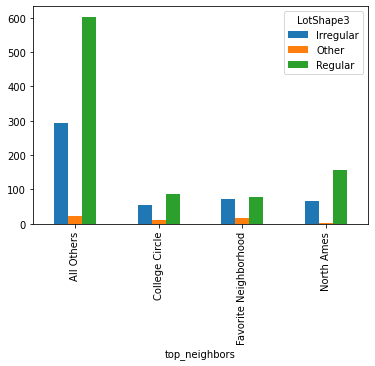

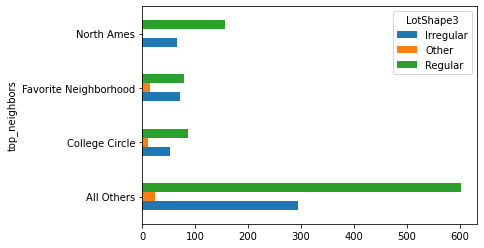

In [37]:
# We can bar-graph some cross tab data to get a better look at it.

# Use crosstab to get some data:
crosstab_results = pd.crosstab(iowa_housing_df['top_neighbors'], 
                               iowa_housing_df['LotShape3'])

# Now to plot the results with a bar graph:
display(crosstab_results.plot(kind='bar'));
# How about we use a Horizontal bar graph:
display(crosstab_results.plot(kind='barh'));



---



---



# WORKING WITH STRINGS IN PANDAS

In [0]:
# Us bash to get retrieve the zip file from desired url:
! wget https://resources.lendingclub.com/LoanStats_201804.csv.zip
# Got a "404: Not Found" error when trying to get the file.

In [0]:
# Decided to attempt another way just to double check the response.
import requests
response = requests.get('https://resources.lendingclub.com/LoanStats_201804.csv.zip')
# Still getting 404 error
response

In [0]:
# I remember I downloaded these before from somewhere so i can just load the 
# files from my local system.
# from google.colab import files
# uploaded = files.upload()

# Had to just use the GUI upload feature, this was going to slow 

In [0]:
# Now that I have my csv file ill read it in.
loans_df = pd.read_csv('LoanStats_2018Q4.csv')
# Display the loans data set
loans_df.head(10)

### The extra rows at the top and bottom of the file have done two things:

1. The top row has made it so that the entire dataset is being interpreted as column headers.

2. The bottom two rows have been read into the 'id' column and are causing every olumn to have at least two `NaN` values in it.

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01